In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-kindle-book-review-for-sentiment-analysis/all_kindle_review .csv
/kaggle/input/amazon-kindle-book-review-for-sentiment-analysis/preprocessed_kindle_review .csv


---
---

In [2]:
# Import necessary libraries
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the datasets
df1 = pd.read_csv('/kaggle/input/amazon-kindle-book-review-for-sentiment-analysis/all_kindle_review .csv')
df2 = pd.read_csv('/kaggle/input/amazon-kindle-book-review-for-sentiment-analysis/preprocessed_kindle_review .csv')


In [4]:
# Step 2: Data Cleaning and Label Encoding
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment labels to df1
df1['sentiment'] = df1['rating'].apply(assign_sentiment)


In [5]:
# Step 3: Prepare features and target variable
X = df1['reviewText']
y = df1['sentiment']


In [6]:
# Step 4: Text Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [7]:
# Step 5: Model Training
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [8]:
# Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.77
              precision    recall  f1-score   support

    negative       0.79      0.82      0.81       803
     neutral       0.49      0.18      0.26       387
    positive       0.78      0.92      0.85      1210

    accuracy                           0.77      2400
   macro avg       0.69      0.64      0.64      2400
weighted avg       0.74      0.77      0.74      2400



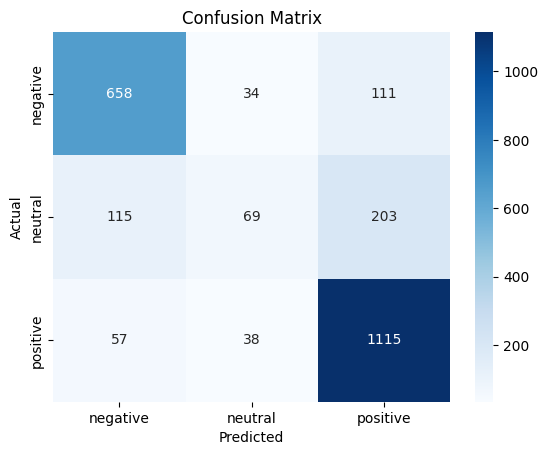

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Explanation 

* F1 Score Calculation: The f1_score function is imported and used to
  calculate the F1 score of the model's predictions. The average='weighted' argument is used to compute   the weighted average of the F1 scores for each class

Output
After running this code, you will see:

Accuracy: The overall accuracy of the model on the test set.
F1 Score: The weighted F1 score, which considers both precision and recall for all classes.
Classification Report: A detailed report showing precision, recall, F1 score, and support for each sentiment class.